In [1]:
import pandas as pd

from itertools import islice
import networkx as nx

import matplotlib.pyplot as plot
import gudhi

In [2]:
class genome_dataframe:
    def __init__(self):
        self.col_names = ['name','sequence','function','range_of','betti_sequence']
        self.df = pd.DataFrame(columns = self.col_names)
    def get_genome(self, name_of):
        return self.df[self.df.name==name_of]
    def set_genome(self, series_of):
        self.df = self.df.append(series_of, ignore_index=True)#, ignore_index = True)
    def get_all(self):
        return self.df

In [31]:
class gen_vec:
    def __init__(self):
        self.window_size=2
        self.incidence = None
        self.distances = None
    def set_sequence(self, sequence_of):
        self.sequence = sequence_of
    def string_to_list(self):
        self.list_sequence
    def get_sequence(self):
        return self.sequence
    def window(self,seq, n=2):
        it = iter(seq)
        result = tuple(islice(it, n))
        if len(result) == n:
            yield result    
        for elem in it:
            result = result[1:] + (elem,)
            yield result
    def join_list(self, list_of):
        return ''.join(str(x) for x in list_of)    
    def flat_join(self, list_of):
        return [join_list(item) for item in list_of]# for item in sublist]
    def more_than_2(self, list_of, n):
        for i in self.window(list_of, n):
            print(flat_join(i))
    def create_incidence(self,idlist, group_val = 1):
        G = nx.Graph()
        if group_val != 1:
            idlist = self.grouping(idlist, group_val)
        for i in self.window(idlist, n=2):
            nx.add_path(G, i)
        self.Graph = G
    def get_edges(self):
        return self.Graph.edges
    def grouping(self, seq_of, n):
        list_of = list()
        for i in islice(self.window(seq_of, n),None, None, 1):
            list_of.append(self.join_list(i))
        return list_of
    def join_list(self,list_of):
        return ''.join(str(x) for x in list_of) 
    def get_incidence(self):
        if self.Graph == None:
            print("Nothing there")
        else:
            return nx.incidence_matrix(self.Graph)

In [34]:
import matplotlib.pyplot as plt
class gene_homo:
    def __init__(self, graph_of):
        self.incidence = graph_of.get_incidence().toarray()
        self.create_rips()
        self.create_simplex_tree()
    def create_rips(self):
        self.rips = gudhi.RipsComplex(points=self.incidence, max_edge_length=42)
    def create_simplex_tree(self, max_dim = 5):
        self.simplex_tree = self.rips.create_simplex_tree(max_dimension = 2)
    def get_simplex_tree(self):
        return self.simplex_tree
    def plot_many_diag(self, length_of=6, seq_of_diag = None):
#         if seq_of_diag == None:
#             seq_of_diag = self.test_bett_window(length_of)
        fig, ax = plt.subplots(3, 2, figsize=(50,50))
#         for ind, i in enumerate(seq_of_diag):
#             gudhi.plot_persistence_barcode(i, axes = ax[int(ind/2)][ind%2])
#         plt.show()
        for i in range(length_of):
            seq_of_diag = self.single_diag(i)
            gudhi.plot_persistence_barcode(seq_of_diag, axes = ax[int(i/2)][i%2])
        plt.show()
    def single_diag(self, ind):
        test.create_incidence(sequence_of[0:3000],1+ind)
        temp = gene_homo(test)
        diag = temp.get_simplex_tree().persistence(homology_coeff_field=2, min_persistence=0)
        return diag
    def test_bett_window(self, length_of = 2):
        temp_filename = "/home/a/Documents/BetaCoV_Jingzhou_HBCDC-HB-01_2020_R1_001.fastq"
        with open(temp_filename, "r") as temp:
            temp_of =  temp.readlines()
        sequence_of = ""
        for i in range( len(temp_of) ):
            if i%4 == 1:
                sequence_of += temp_of[i]
        test = gen_vec()
        diag_list = list()
#         print(len(sequence_of))
        test.create_incidence(sequence_of[0:1000],1)
        temp = gene_homo(test)
        diag = temp.get_simplex_tree().persistence(homology_coeff_field=2, min_persistence=0)
        diag_list.append(diag)
#         for i in range(6):
#             test.create_incidence(sequence_of[0:10000],i+1)
#             temp = gene_homo(test)
#             diag = temp.get_simplex_tree().persistence(homology_coeff_field=2, min_persistence=0)
#             diag_list.append(diag)
        self.diag = diag_list
        return diag_list

In [5]:
# temp = genome_dataframe()
# temp.get_genome("test")
# test_series = pd.Series(data=[1,2,3,4,5])
# test_series = {'name': 1, 'sequence':2, 'function':3,'range_of':4, 'betti_sequence':5}
# temp.set_genome(test_series)
# temp.get_all()

In [7]:
# test = gen_vec()
# test.set_sequence("abc")
# test.create_incidence([char for char in "abcdef"],2)

In [8]:
# temp = gene_homo(test)
# diag = temp.get_simplex_tree().persistence(homology_coeff_field=2, min_persistence=0)
# print(diag)

In [6]:
#Format: 
temp_filename = "/home/a/Documents/BetaCoV_Jingzhou_HBCDC-HB-01_2020_R1_001.fastq"
with open(temp_filename, "r") as temp:
    temp_of =  temp.readlines()

In [7]:
sequence_of = ""
for i in range( len(temp_of) ):
    if i%4 == 1:
        sequence_of += temp_of[i]
#     print(temp_of[4*(i+3)])

In [30]:
temp_seq = sequence_of[0:100].replace("\n", "")
len(sequence_of)/10**4

36552.9329

In [9]:
test = gen_vec()
test.create_incidence(temp_seq,5)

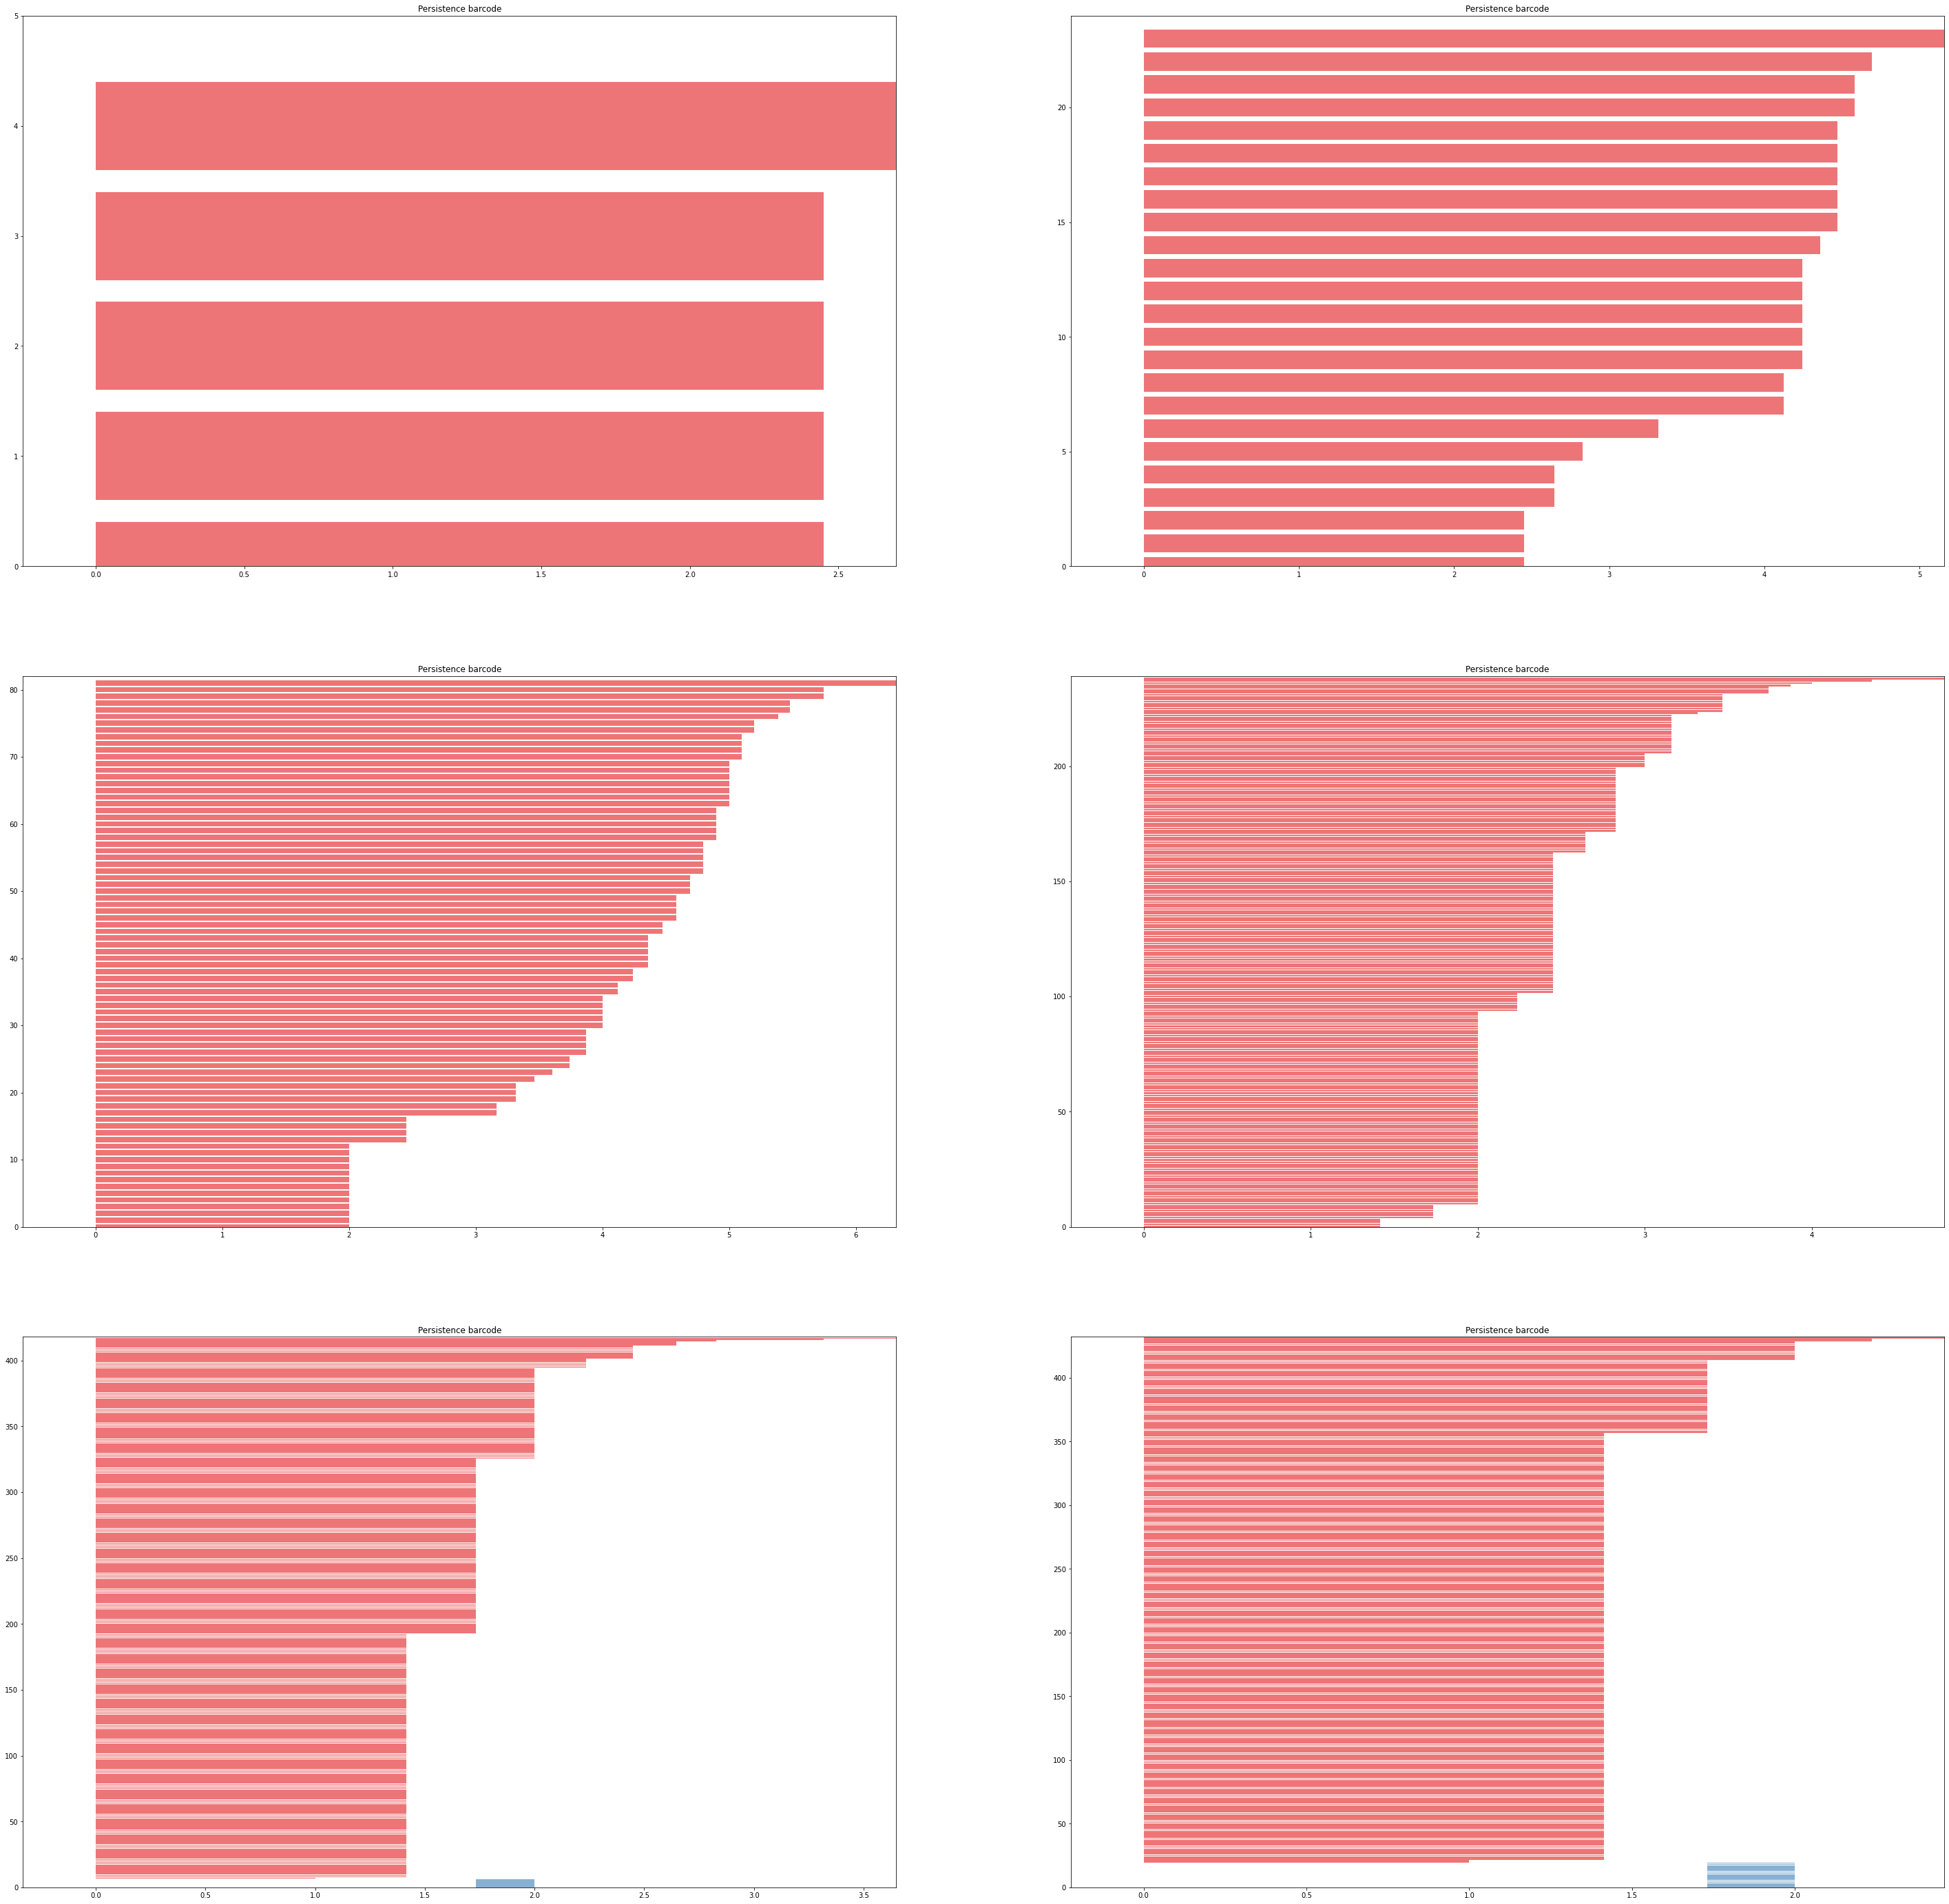

In [35]:
temp = gene_homo(test)
# diag = temp.get_simplex_tree().persistence(homology_coeff_field=2, min_persistence=0)
# # gudhi.plot_persistence_diagram(diag)
# # plot.show()
# temp.plot_many_diag()
# temp.test_bett_window()
# temp.plot_many_diag()
# import cProfile
# import re
# cProfile.run('temp.plot_many_diag()')
temp.plot_many_diag()